# PursuitEvasion8x8-v0 posggym-agents policy analysis


## Notation

- **Same-play** refers to pairings of policies that are trained together or at least trained as part of the same population
- **Cross-play** refers to pairings of policies that were not trained together

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from posggym_agents.exp import plot_utils

from posggym_agents.agents.pursuitevasion8x8_v0.load import BASE_DIR

# Data Loading

In [5]:
results_filepath = osp.join(BASE_DIR, "results", "pairwise_results.csv")
all_df = plot_utils.import_results(results_filepath)

print("Columns")
print("-------")
for c in all_df.columns:
    print(f"  {c}")

Columns
-------
  Unnamed: 0
  exp_id
  agent_id
  env_name
  policy_id
  exp_seed
  num_episodes
  time_limit
  episode_return_mean
  episode_return_std
  episode_return_max
  episode_return_min
  episode_steps_mean
  episode_steps_std
  episode_time_mean
  episode_time_std
  num_episode_done
  num_LOSS
  num_DRAW
  num_WIN
  num_NA
  episode_return_CI
  episode_steps_CI
  episode_time_CI
  coplayer_policy_id


# The environment

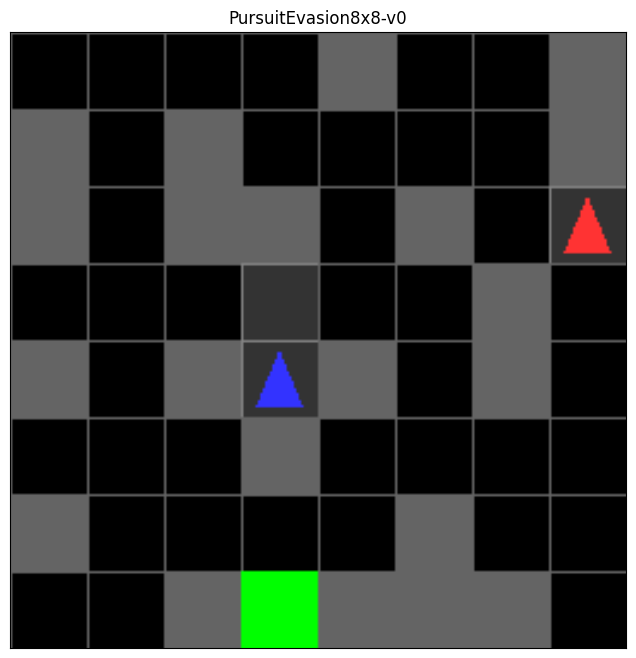

In [3]:
plot_utils.plot_environment(all_df["env_name"].unique()[0])    
plt.show()

## The policies

In [4]:
policy_ids = all_df["policy_id"].unique().tolist()
policy_ids.sort()

print("Policy IDs")
print("----------")
for pi_id in policy_ids:
    print(f"  {pi_id}")

Policy IDs
----------
  klr_k0_seed0_i0-v0
  klr_k0_seed0_i1-v0
  klr_k0_seed1_i0-v0
  klr_k0_seed1_i1-v0
  klr_k0_seed2_i0-v0
  klr_k0_seed2_i1-v0
  klr_k0_seed3_i0-v0
  klr_k0_seed3_i1-v0
  klr_k0_seed4_i0-v0
  klr_k0_seed4_i1-v0
  klr_k1_seed0_i0-v0
  klr_k1_seed0_i1-v0
  klr_k1_seed1_i0-v0
  klr_k1_seed1_i1-v0
  klr_k1_seed2_i0-v0
  klr_k1_seed2_i1-v0
  klr_k1_seed3_i0-v0
  klr_k1_seed3_i1-v0
  klr_k1_seed4_i0-v0
  klr_k1_seed4_i1-v0
  klr_k2_seed0_i0-v0
  klr_k2_seed0_i1-v0
  klr_k2_seed1_i0-v0
  klr_k2_seed1_i1-v0
  klr_k2_seed2_i0-v0
  klr_k2_seed2_i1-v0
  klr_k2_seed3_i0-v0
  klr_k2_seed3_i1-v0
  klr_k2_seed4_i0-v0
  klr_k2_seed4_i1-v0
  klr_k3_seed0_i0-v0
  klr_k3_seed0_i1-v0
  klr_k3_seed1_i0-v0
  klr_k3_seed1_i1-v0
  klr_k3_seed2_i0-v0
  klr_k3_seed2_i1-v0
  klr_k3_seed3_i0-v0
  klr_k3_seed3_i1-v0
  klr_k3_seed4_i0-v0
  klr_k3_seed4_i1-v0
  klr_k4_seed0_i0-v0
  klr_k4_seed0_i1-v0
  klr_k4_seed1_i0-v0
  klr_k4_seed1_i1-v0
  klr_k4_seed2_i0-v0
  klr_k4_seed2_i1-v0
  klr_k4_see

### RL Pairwise Policy Performance

Here we look at the performance for each possible pairing of policies.

For each performance metric we have a grid of (grid)-plots:
    
- Outer-grid: train seed X train seed
- Inner-grid: policy_id X policy_id

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


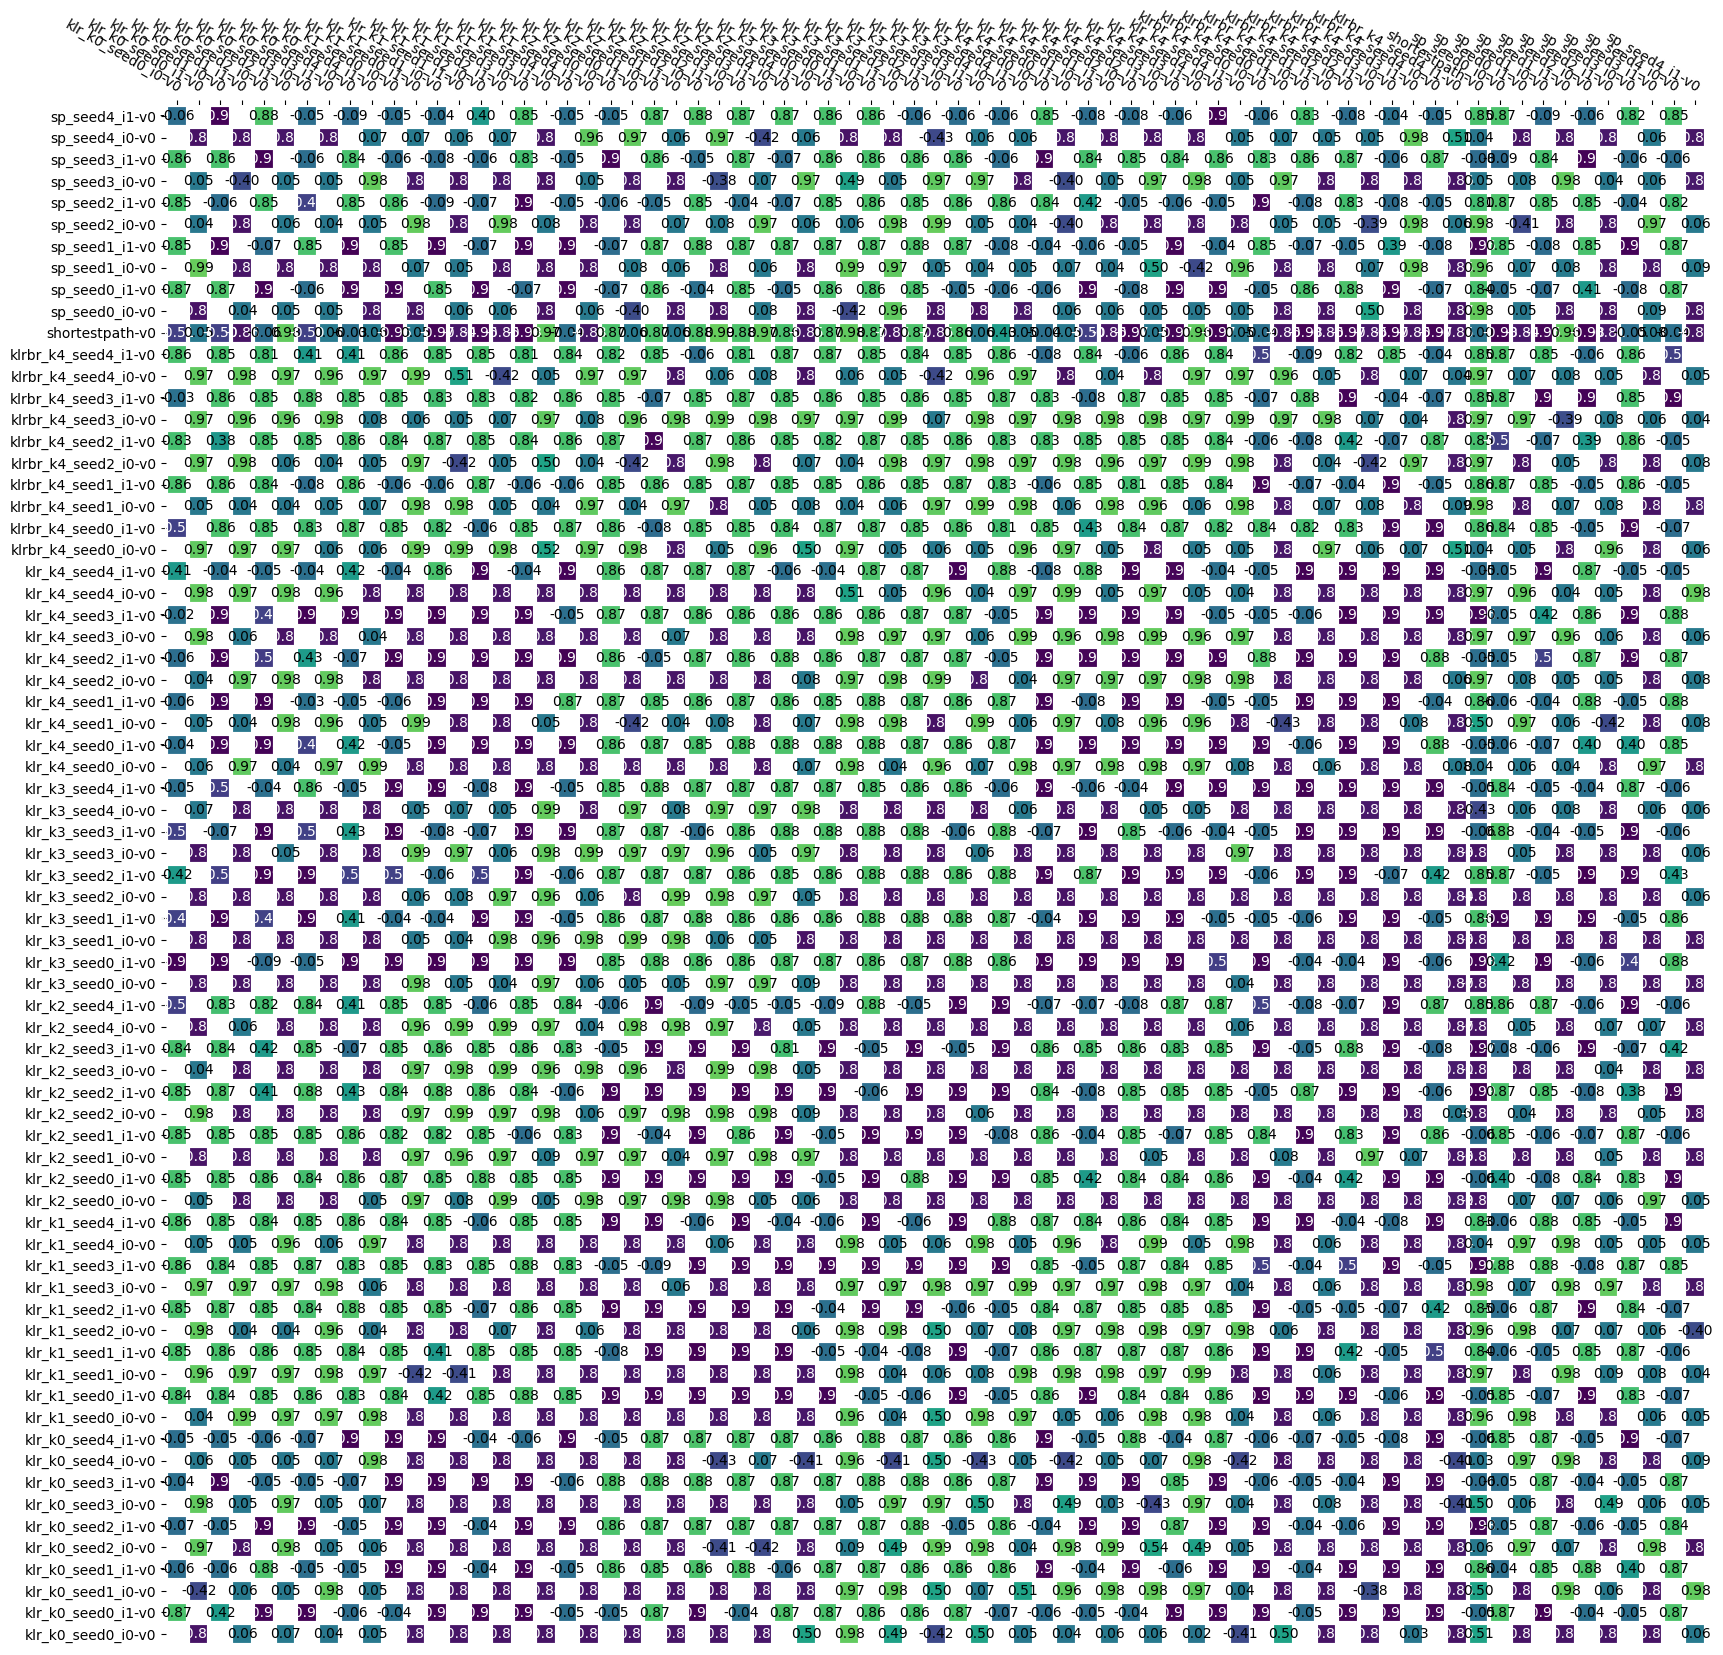

In [7]:
plot_utils.plot_pairwise_comparison(
    all_df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    vrange=(-1.0, 1.6), 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

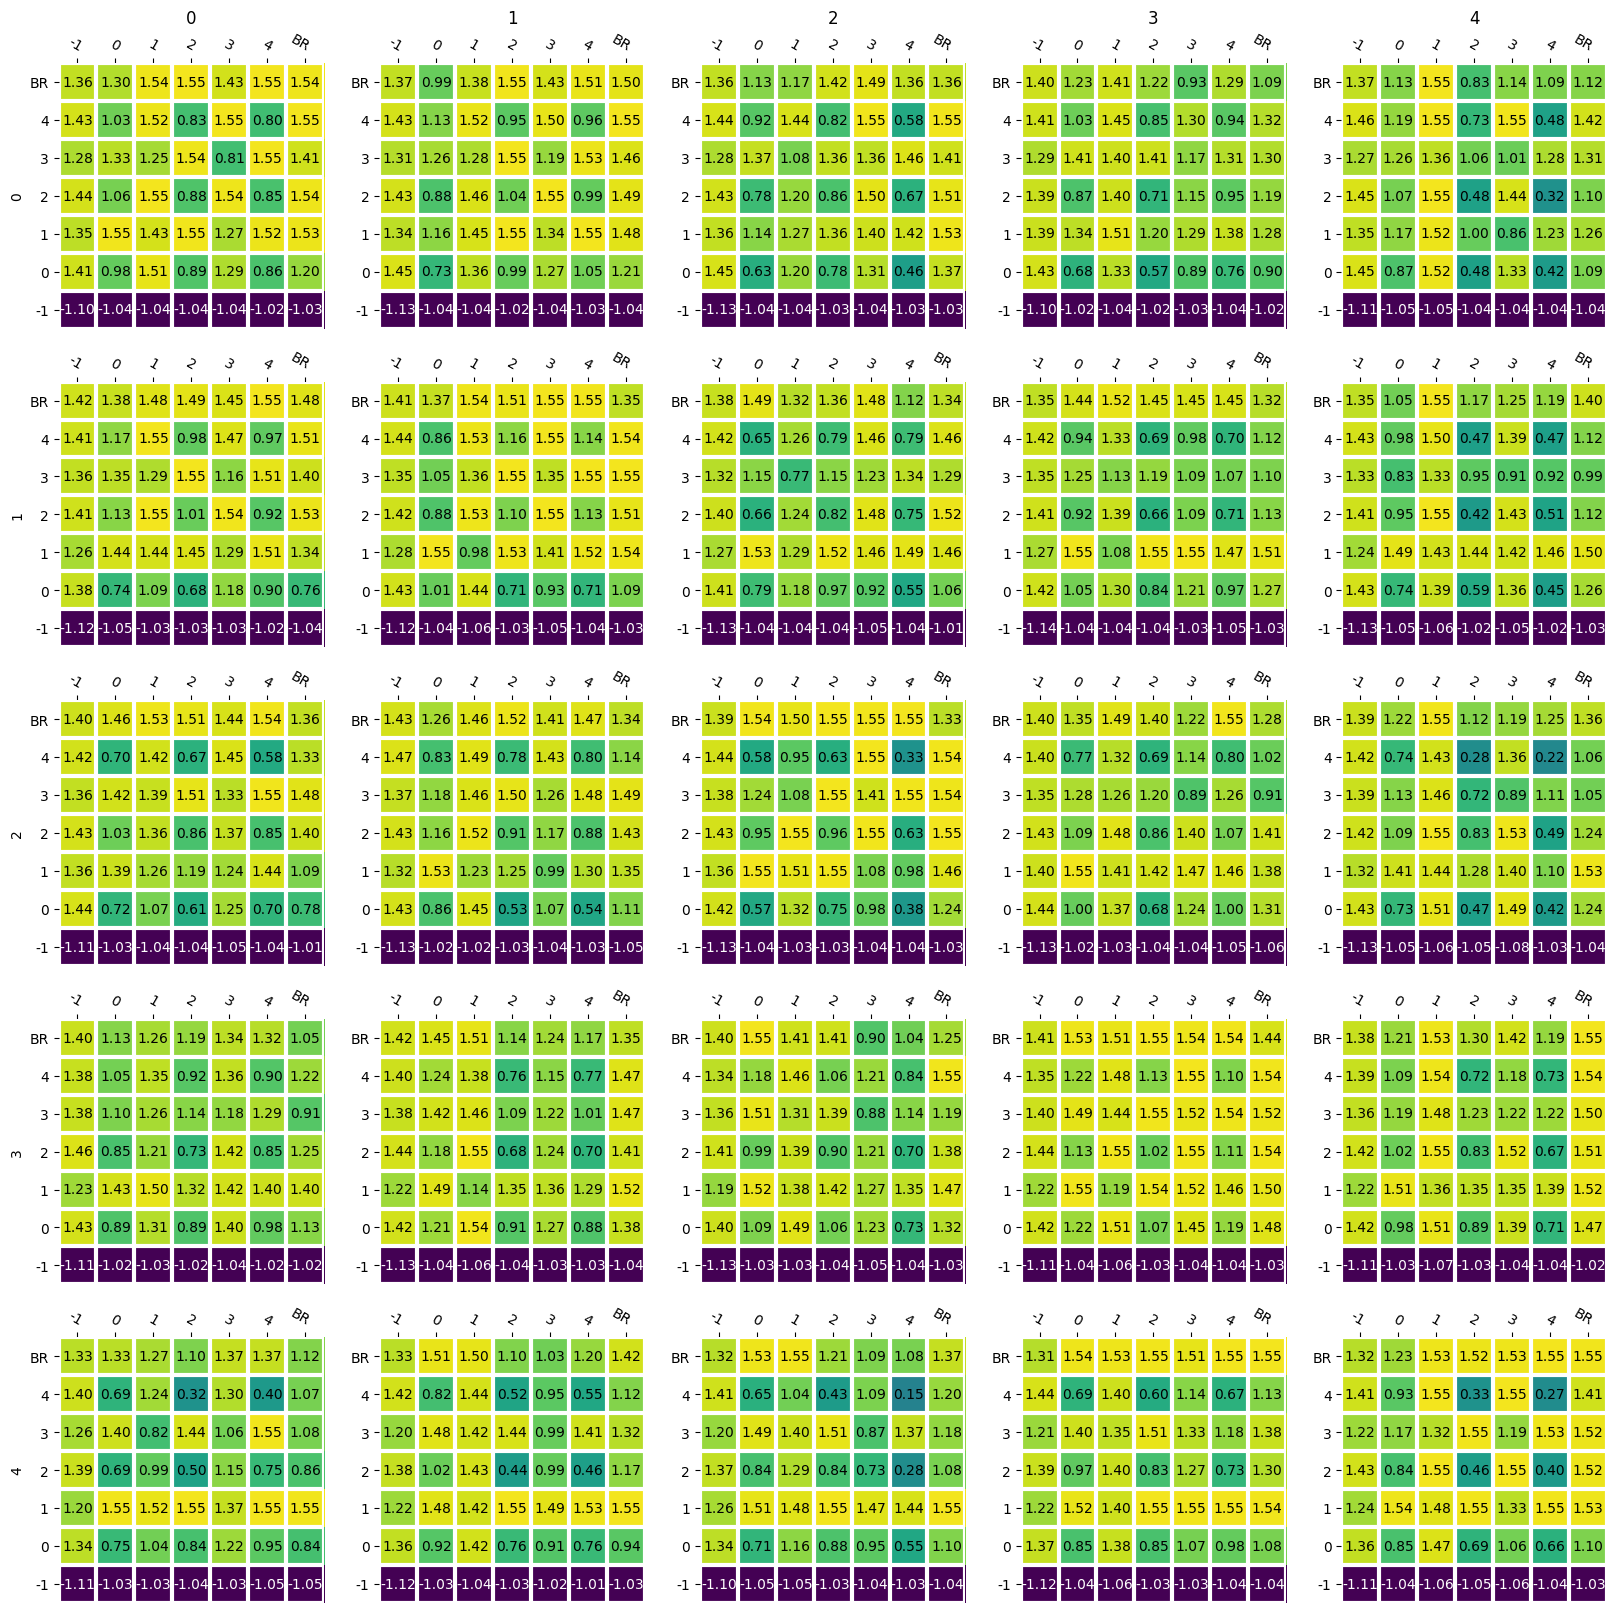

In [6]:
plot_utils.plot_pairwise_population_comparison(
    all_df, 
    y_key="episode_returns_mean", 
    pop_key="policy_seed",
    policy_key="K",
    vrange=(-1.0, 1.6), 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

### RL average policy performance

Here we look at average performance of the policies learned using RL by themselves.

Each plot shows the *mean performance* for the *row* policy against the *column* policy.

The **left-hand plot** shows *same-play* performance. So performance of policies against policies from the same training population. With the values shown being the mean over all populations.

The **middle plot** shows *cross-play* performance. So performance of policies against policies from different training populations. With the values shown being the mean over all populations.

The **right-hand plot** shows the generalization gap which is just the difference between the *Same-Play* and *Cross-Play* performance.

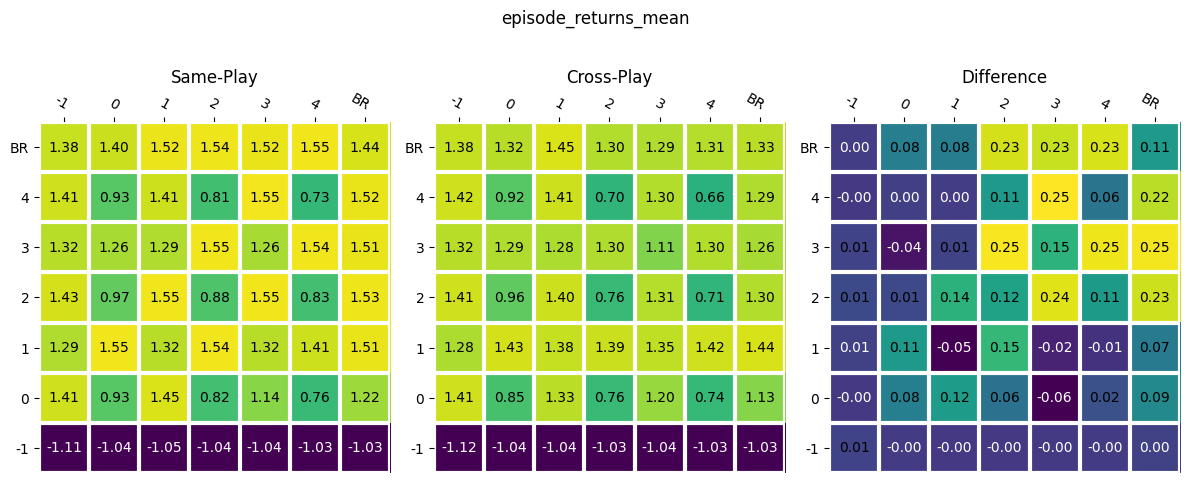

In [7]:
# TODO Update this and below

plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="episode_returns_mean", 
    policy_key="K",
    pop_key="policy_seed",
    vrange=(-1.0, 1.6)
)
plt.show()

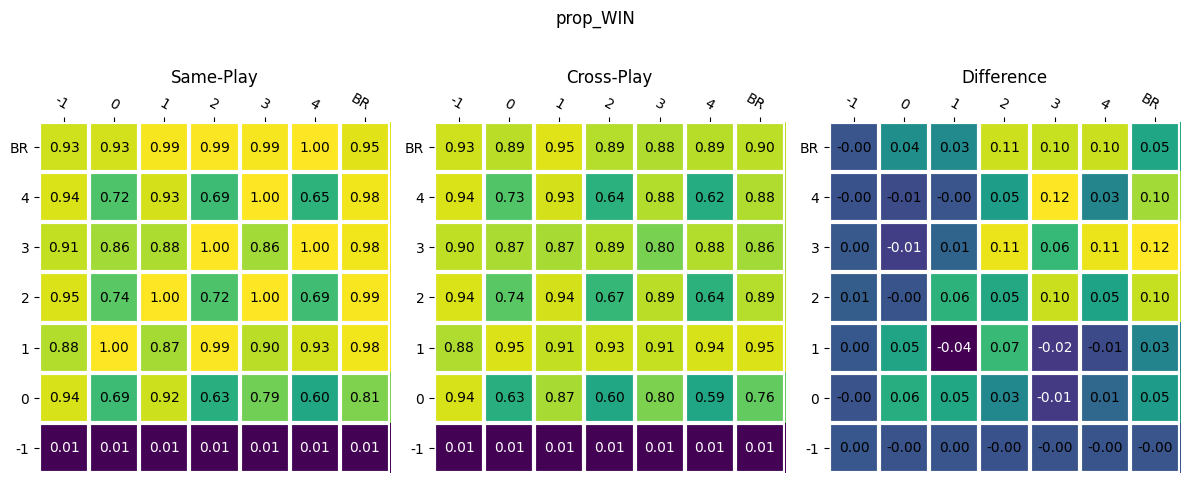

In [8]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="prop_WIN", 
    policy_key="K",
    pop_key="policy_seed",
    vrange=(0.0, 1.0)
)
plt.show()

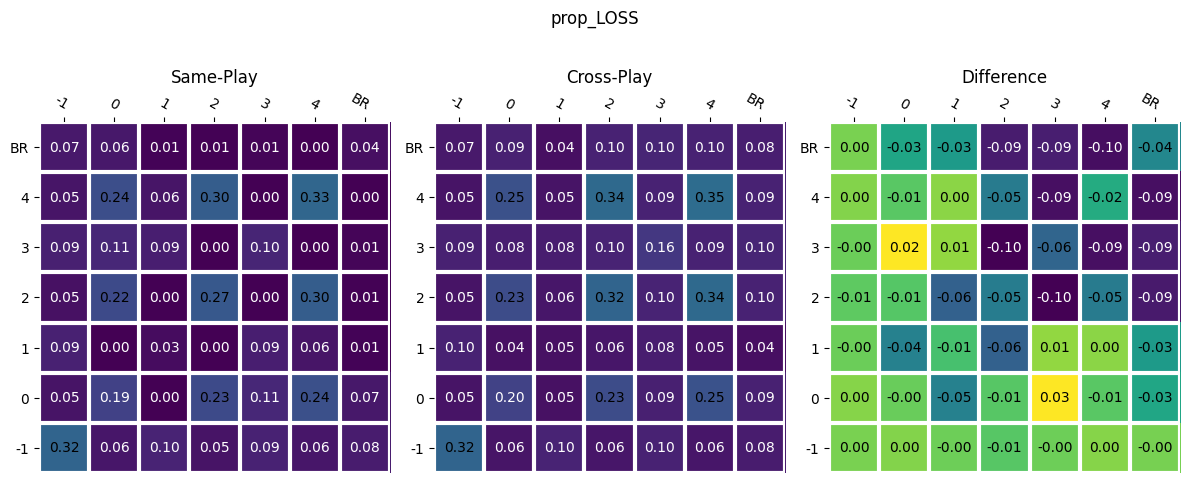

In [9]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="prop_LOSS", 
    policy_key="K",
    pop_key="policy_seed",
    vrange=(0.0, 1.0)
)
plt.show()